In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.utils import to_categorical


In [4]:
dataset = pd.read_csv("./data.csv")

In [ ]:
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [16]:
dataset.head(10)

,cat__diagnosis_M,num__radius_mean,num__texture_mean,num__perimeter_mean,num__area_mean,num__smoothness_mean,num__compactness_mean,num__concavity_mean,num__concave points_mean,num__symmetry_mean,...,num__radius_worst,num__texture_worst,num__perimeter_worst,num__area_worst,num__smoothness_worst,num__compactness_worst,num__concavity_worst,num__concave points_worst,num__symmetry_worst,num__fractal_dimension_worst
0,1.0,0.042075,-0.954684,0.091977,-0.272534,0.187506,0.584075,0.406279,0.462227,0.372727,...,0.241551,-0.716951,0.336620,-0.098604,0.202272,0.238583,0.137220,0.824055,0.196925,-0.162272
1,1.0,0.286289,-0.454853,0.231567,0.003181,-0.420240,-0.636464,-0.592784,-0.302485,-0.240404,...,0.213803,-0.392857,0.079635,-0.129571,-0.304893,-0.690873,-0.614058,0.278351,-0.532821,-0.554244
2,1.0,0.202991,-0.219479,0.191486,-0.101166,0.028618,-0.137967,-0.074977,0.271372,0.019192,...,0.112771,-0.279851,0.016883,-0.250983,-0.032820,-0.229250,-0.280511,0.670103,-0.192588,-0.573134
3,1.0,-0.579819,-0.278323,-0.532997,-0.794189,0.622642,0.622723,0.131209,0.045726,0.552525,...,-0.503380,-0.228145,-0.517307,-0.811984,0.830945,0.628023,0.097284,0.769759,1.000000,0.547422
4,1.0,0.259785,-0.686845,0.261972,-0.021421,-0.139298,-0.304214,-0.072165,0.036779,-0.243434,...,0.039488,-0.752132,0.013895,-0.316850,-0.125272,-0.655170,-0.361022,0.116838,-0.684999,-0.714810
5,1.0,-0.482323,-0.594860,-0.464032,-0.716988,0.357227,-0.076008,-0.260544,-0.195924,0.037374,...,-0.463536,-0.374733,-0.472185,-0.726504,0.425477,-0.034433,-0.144569,0.196564,-0.045929,-0.090122
6,1.0,0.066686,-0.305377,0.047751,-0.239449,-0.241672,-0.450218,-0.471884,-0.264414,-0.258586,...,0.063678,-0.166311,0.023856,-0.301612,-0.035462,-0.553104,-0.395527,0.327835,-0.409422,-0.624295
7,1.0,-0.363056,-0.247886,-0.358579,-0.631474,0.196533,-0.109748,-0.561106,-0.405070,0.147475,...,-0.350409,-0.140725,-0.400468,-0.650118,0.244535,-0.338495,-0.572204,0.069416,-0.356988,-0.212121
8,1.0,-0.430262,-0.180927,-0.395895,-0.680764,0.348199,0.066315,-0.128866,-0.070278,0.303030,...,-0.462113,-0.002665,-0.444295,-0.727635,0.309252,-0.004938,-0.138978,0.415808,0.109008,-0.315755
9,1.0,-0.481376,-0.030774,-0.444682,-0.718006,0.191117,0.350960,0.065136,-0.150795,-0.020202,...,-0.490573,0.527719,-0.529459,-0.741349,0.507363,1.000000,0.765176,0.518900,0.104278,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
def preprocess(df):
    df = df.drop(columns=["id", "Unnamed: 32"])

    categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
    numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


    cat_pipeline = Pipeline(
        [
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(drop="first")),
        ]
    )

    num_pipeline = Pipeline(
        [("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler(feature_range=(-1,1)))]
    )

    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", cat_pipeline, categorical_features),
            ("num", num_pipeline, numerical_features),
        ]
    )

    preprocessed_df = preprocessor.fit_transform(df)

    feature_names = preprocessor.get_feature_names_out()

    # Convert the preprocessed data back to a DataFrame with the feature names
    preprocessed_df = pd.DataFrame(preprocessed_df, columns=feature_names)

    return preprocessed_df


In [8]:
dataset = preprocess(dataset)


In [9]:
display(dataset.head(1))

,cat__diagnosis_M,num__radius_mean,num__texture_mean,num__perimeter_mean,num__area_mean,num__smoothness_mean,num__compactness_mean,num__concavity_mean,num__concave points_mean,num__symmetry_mean,...,num__radius_worst,num__texture_worst,num__perimeter_worst,num__area_worst,num__smoothness_worst,num__compactness_worst,num__concavity_worst,num__concave points_worst,num__symmetry_worst,num__fractal_dimension_worst
0,1.0,0.042075,-0.954684,0.091977,-0.272534,0.187506,0.584075,0.406279,0.462227,0.372727,...,0.241551,-0.716951,0.33662,-0.098604,0.202272,0.238583,0.13722,0.824055,0.196925,-0.162272


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, dataset["cat__diagnosis_M"], test_size=0.2, random_state=42
)
X_train = X_train.drop(columns=["cat__diagnosis_M"])
X_test = X_test.drop(columns=["cat__diagnosis_M"])


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
input_size = X_train.shape[1]
print("nombre d'input = ", input_size)


(455, 30)
(114, 30)
(455,)
(114,)
nombre d'input =  30


In [12]:
model_parameters = {
    "epoch": 20,
    "batch_size": 2,
    "validation_split": 0.1,
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test,
    "loss": "binary_crossentropy",
    "optimizer": "adam",
    "metrics": ["accuracy"],
}


## Pour les réseaux de neurones. on préfèrera avoir une moyenne nulle et donc on fait notre scaler entre -1 et 1 plutot que entre 0 et 1 
c'est bcp plus efficace presque 10% de val accuracy

In [13]:
model = tf.keras.Sequential()
model.add(Dense(16, input_shape=(input_size,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss=model_parameters["loss"],
    optimizer=model_parameters["optimizer"],
    metrics=model_parameters["metrics"],
)
history = model.fit(
    model_parameters["X_test"],
    model_parameters["y_test"],
    epochs=model_parameters["epoch"],
    batch_size=model_parameters["batch_size"],
    validation_split=model_parameters["validation_split"],
)


Epoch 1/20


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6397 - loss: 0.5790 - val_accuracy: 0.7500 - val_loss: 0.4652
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7367 - loss: 0.5170 - val_accuracy: 0.9167 - val_loss: 0.3700
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7992 - loss: 0.4168 - val_accuracy: 0.9167 - val_loss: 0.2934
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8281 - loss: 0.3558 - val_accuracy: 0.9167 - val_loss: 0.2373
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9521 - loss: 0.1935 - val_accuracy: 0.9167 - val_loss: 0.2274
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9452 - loss: 0.2115 - val_accuracy: 1.0000 - val_loss: 0.1504
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9649 - loss: 0.1592 - val_accuracy: 0.9167 - val_loss: 0.1677
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9247 - loss: 0.1447 - val_accuracy: 0.9167 - val_loss: 0.1438
E

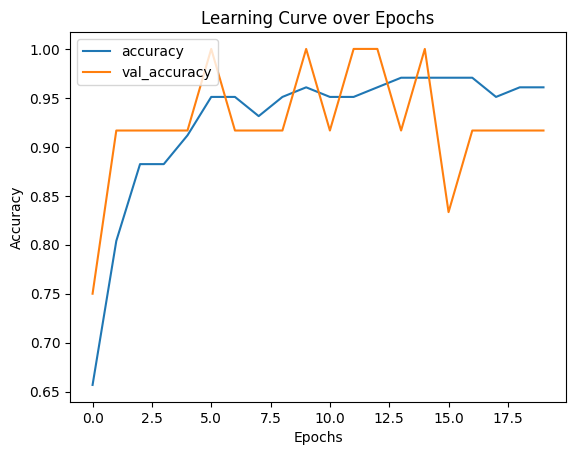

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Learning Curve over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy", "val_accuracy"], loc="upper left")
plt.show()


In [ ]:
model.save("BreastCancer.keras")

In [ ]:
my_best_model = keras.models.load_model("./BreastCancer.keras")

In [ ]:
my_best_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)